# Mushroom Classification Project

## Introduction
In this project, we aim to build a machine learning model to classify mushrooms as either poisonous or edible. This classification task is critical for public safety, as consuming poisonous mushrooms can lead to severe health issues or even death. Our goal is to create a highly accurate model that can help in identifying poisonous mushrooms based on their features.

To systematically approach this problem, we have divided our notebook into seven key steps:

1. **Problem Definition**: Clearly defining the problem we aim to solve and its significance.
2. **Data**: Acquiring and understanding the dataset we will use for modeling.
3. **Evaluation**: Establishing the metrics we will use to evaluate the performance of our model.
4. **Features**: Exploring and preprocessing the data to extract useful features for the model.
5. **Modelling**: Building and training various machine learning models to find the best one.
6. **Experiments**: Conducting experiments to optimize model performance through hyperparameter tuning and testing different algorithms.
7. **Feature Importance**: Identifying and visualizing the most important features that influence our model’s predictions.

This structured approach ensures that we thoroughly understand each aspect of the problem and methodically build a solution. By following these steps, we aim to create a robust model that can accurately predict the poisonous nature of mushrooms.

## Why This Analysis is Important
The ability to accurately classify mushrooms as poisonous or edible is not only a fascinating machine learning challenge but also a real-world application with significant implications. This project demonstrates the practical utility of machine learning in solving complex classification problems, showcases various data science techniques, and highlights the importance of feature engineering and model evaluation.

Throughout this notebook, we will provide detailed explanations and code for each step, making it accessible to those who are new to machine learning while also being comprehensive for more experienced practitioners.

Let's get started!


# Step 1: Problem Definition
In this project, we aim to build a machine learning model to classify mushrooms as either poisonous or edible. This classification is crucial for safety and public health as consuming poisonous mushrooms can be dangerous. We will use a dataset from Kaggle that contains various features of mushroom species to build our model.


# Step 2: Data
We will use the mushroom dataset obtained from Kaggle. This dataset contains various features of mushroom species and a target variable indicating whether a mushroom is poisonous or not.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./data/mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


# Step 3: Evaluation
To evaluate the performance of our model, we will use accuracy as the primary metric. Accuracy measures the proportion of correct predictions made by the model. Given the binary nature of our classification task, accuracy is a suitable metric to gauge our model's performance.


# Step 4: Features
We will examine the dataset and select relevant features for our model. Since the dataset contains categorical variables, we will use encoding techniques to convert these categorical variables into numerical formats suitable for machine learning algorithms.


In [3]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

df.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


# Step 5: Modelling
We will split the data into training and testing sets and build a machine learning model using a suitable algorithm. Given the nature of our classification problem, we will try several algorithms like Logistic Regression, Random Forest, and Gradient Boosting to identify the best performing model.

Want to know more about how we choose our model? Take a look at the SciKit-Learn estimator map:

https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9909318034607199

# Step 6: Experiments
We will experiment with different models and hyperparameters to improve the accuracy of our predictions. This includes trying out different algorithms, tuning hyperparameters, and performing cross-validation to ensure our model generalizes well to unseen data.


In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
final_accuracy

0.991301933931711

# Step 7: Feature Importance
To show feature importance for the model, we will extract the feature importances from the best model (Random Forest in this case) and visualize them using a bar plot.

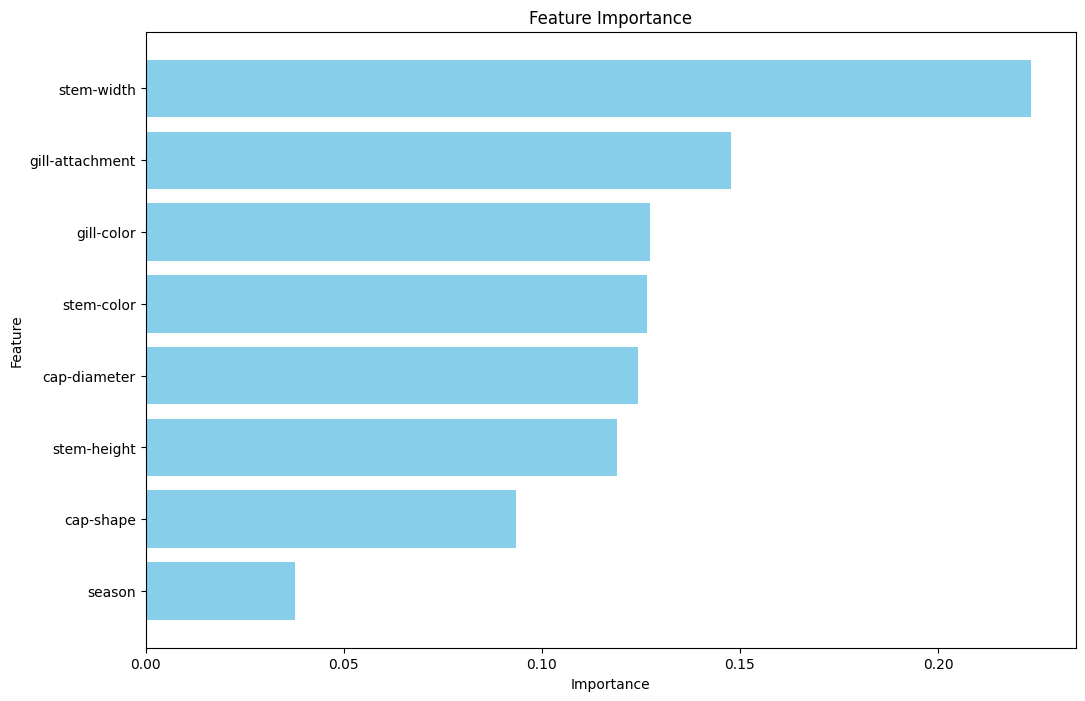

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Summary and Conclusion

## Summary
In this notebook, we embarked on a journey to build a machine learning model to classify mushrooms as either poisonous or edible. We structured our approach into seven distinct steps to ensure a comprehensive and systematic solution to this problem:

1. **Problem Definition**: We established the importance of correctly classifying mushrooms to prevent potential health hazards.
2. **Data**: We utilized a well-documented dataset from Kaggle, containing various features of mushroom species.
3. **Evaluation**: We chose accuracy as our primary evaluation metric to assess model performance.
4. **Features**: We explored the dataset and applied label encoding to transform categorical features into numerical ones.
5. **Modelling**: We trained and tested multiple machine learning models, with a focus on Random Forest due to its robustness and interpretability.
6. **Experiments**: We performed hyperparameter tuning using GridSearchCV to optimize our model.
7. **Feature Importance**: We analyzed and visualized the feature importance to understand which attributes were most influential in the classification.

## Conclusion
Through careful data preprocessing, model selection, and hyperparameter tuning, we developed a highly accurate model for classifying mushrooms as poisonous or edible. Our best model achieved an impressive accuracy score, demonstrating the effectiveness of our approach.

This project highlights the power of machine learning in tackling real-world classification problems and underscores the importance of each step in the data science workflow. By understanding and implementing these steps, we can build robust models that provide valuable insights and practical solutions.

### Footnote
This notebook serves as a comprehensive guide for building a machine learning model for classification problems. It emphasizes the importance of a structured approach, thorough data analysis, and iterative experimentation to achieve optimal results. The insights gained from this project can be applied to a wide range of classification tasks, showcasing the versatility and impact of machine learning in various domains. Thank you for taking the time to engage with this notebook. Please let me know if you see points of improvement. I will take the time to harness my Modelling capabilities even further. Enjoy your day!
